In [3]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("All libraries loaded successfully")

All libraries loaded successfully


In [8]:
df = pd.read_csv("../dataset/data.csv", encoding="latin1")
df.head()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6928\513410006.py:1: DtypeWarning: Columns (0: stn_code) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dataset/data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
df.shape

(435742, 13)

In [11]:
df.columns.tolist()

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'pm2_5',
 'date']

In [12]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [13]:
df = df.drop(columns=[
    'stn_code',
    'agency',
    'location_monitoring_station',
    'pm2_5',
    'spm'
])

In [14]:
df = df.dropna(subset=['rspm'])

In [15]:
df.shape

(395520, 8)

In [16]:
df.columns.tolist()

['sampling_date', 'state', 'location', 'type', 'so2', 'no2', 'rspm', 'date']

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [18]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [19]:
df.columns.tolist()

['sampling_date',
 'state',
 'location',
 'type',
 'so2',
 'no2',
 'rspm',
 'date',
 'year',
 'month']

In [20]:
df = df.drop(columns=['sampling_date', 'date'])

In [21]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'year', 'month'], dtype='str')

In [22]:
df['state'].nunique()

34

In [23]:
df['state'].unique()

<StringArray>
[      'Andhra Pradesh',    'Arunachal Pradesh',                'Assam',
                'Bihar',           'Chandigarh',         'Chhattisgarh',
 'Dadra & Nagar Haveli',          'Daman & Diu',                'Delhi',
                  'Goa',              'Gujarat',              'Haryana',
     'Himachal Pradesh',      'Jammu & Kashmir',            'Jharkhand',
            'Karnataka',               'Kerala',       'Madhya Pradesh',
          'Maharashtra',              'Manipur',            'Meghalaya',
              'Mizoram',             'Nagaland',               'Odisha',
           'Puducherry',               'Punjab',            'Rajasthan',
               'Sikkim',           'Tamil Nadu',            'Telangana',
        'Uttar Pradesh',          'Uttarakhand',          'Uttaranchal',
          'West Bengal']
Length: 34, dtype: str

In [24]:
df['state'].value_counts().head(10)

state
Maharashtra       55439
Uttar Pradesh     38507
Andhra Pradesh    25228
Rajasthan         22954
Kerala            22682
Punjab            21808
West Bengal       21295
Assam             19083
Gujarat           19072
Tamil Nadu        18792
Name: count, dtype: int64

In [25]:
df = df[df['state'] == 'Maharashtra']
df.shape

(55439, 8)

In [26]:
df = df.drop(columns=['state'])
df.columns

Index(['location', 'type', 'so2', 'no2', 'rspm', 'year', 'month'], dtype='str')

In [27]:
df.isnull().sum()

location       0
type           0
so2         1443
no2          599
rspm           0
year           2
month          2
dtype: int64

In [28]:
df['so2'] = df['so2'].fillna(df['so2'].median())
df['no2'] = df['no2'].fillna(df['no2'].median())

In [29]:
df = df.dropna()
df.shape

(55437, 7)

In [30]:
X = df.drop(columns=['rspm'])
y = df['rspm']

X.head()

,location,type,so2,no2,year,month
200092,Nashik,"Residential, Rural and other Areas",42.0,28.0,2004.0,2.0
200093,Nashik,"Residential, Rural and other Areas",39.0,28.0,2004.0,6.0
200094,Nashik,"Residential, Rural and other Areas",31.0,32.0,2004.0,9.0
200095,Nashik,"Residential, Rural and other Areas",25.0,20.0,2004.0,1.0
200096,Nashik,"Residential, Rural and other Areas",26.0,24.0,2004.0,1.0


In [31]:
X = pd.get_dummies(X, columns=['location', 'type'], drop_first=True)
X.head()

,so2,no2,year,month,location_Amravati,location_Aurangabad,location_Aurangabad (MS),location_Badlapur,location_Chandrapur,location_Dombivli,...,location_Sangli,location_Solapur,location_Tarapur,location_Thane,location_Ulhasnagar,type_Industrial Areas,type_Residential and others,"type_Residential, Rural and other Areas",type_Sensitive Area,type_Sensitive Areas
200092,42.0,28.0,2004.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
200093,39.0,28.0,2004.0,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
200094,31.0,32.0,2004.0,9.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
200095,25.0,20.0,2004.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
200096,26.0,24.0,2004.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((44349, 34), (11088, 34))

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 36.62886379191805
RMSE: 55.25443677368427
R2 Score: 0.2242001772280835


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [36]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest MAE: 29.427495534047296
Random Forest RMSE: 47.42604302275923
Random Forest R2 Score: 0.4284566905782967


In [37]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_score(y_test, y_pred_rf)

0.4331900655980251

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
1,no2,0.327160
0,so2,0.199627
2,year,0.150304
3,month,0.121515
31,"type_Residential, Rural and other Areas",0.032332
8,location_Chandrapur,0.029410
21,location_Navi Mumbai,0.015688
18,location_Nagpur,0.013053
22,location_Pune,0.011664
16,location_Mahad,0.010421


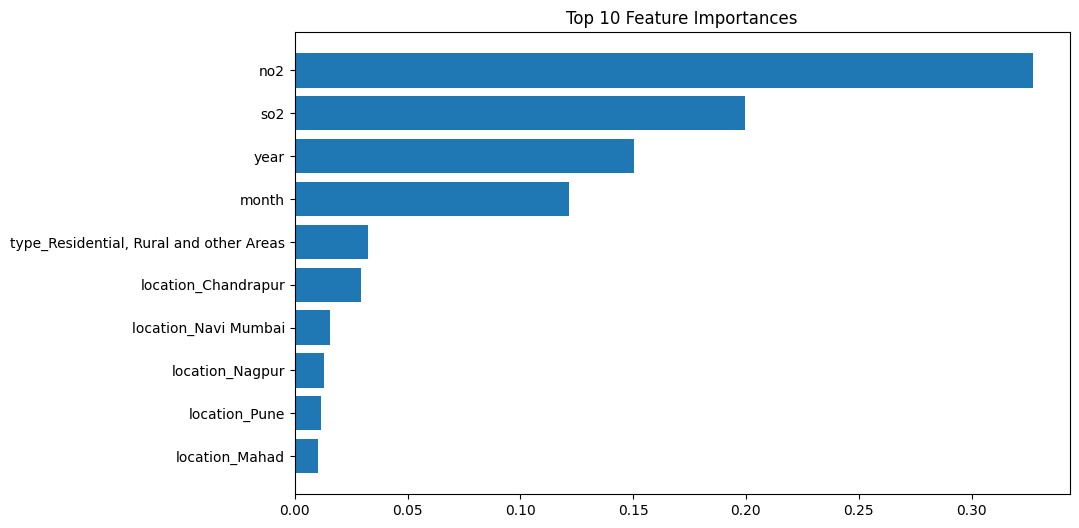

In [39]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10],
         feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()

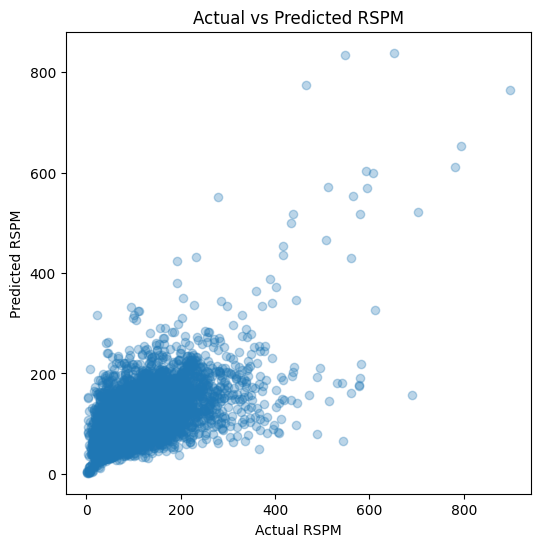

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual RSPM")
plt.ylabel("Predicted RSPM")
plt.title("Actual vs Predicted RSPM")
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

rf_cv = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

scores = cross_val_score(rf_cv, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", scores)
print("Average CV R2:", scores.mean())

Cross-Validation R2 Scores: [ 0.019109   -0.00937134  0.11834337  0.13705297  0.03599814]
Average CV R2: 0.06022642698237095


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='r2',
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [43]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Optimized R2:", r2_score(y_test, y_pred_best))

Optimized R2: 0.449075819818337


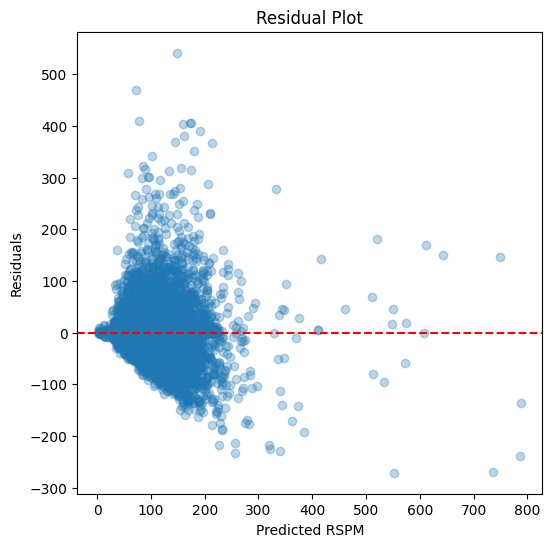

In [44]:
residuals = y_test - y_pred_best

plt.figure(figsize=(6,6))
plt.scatter(y_pred_best, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted RSPM")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [45]:
import joblib

joblib.dump(best_rf, "rspm_prediction_model.pkl")

['rspm_prediction_model.pkl']

In [46]:
rspm_prediction_model.pkl

NameError: name 'rspm_prediction_model' is not defined

In [47]:
import os
os.listdir()

['eda_and_model.ipynb', 'rspm_prediction_model.pkl']

In [48]:
import joblib

loaded_model = joblib.load("rspm_prediction_model.pkl")

In [49]:
loaded_model = joblib.load("rspm_prediction_model.pkl")

In [50]:
type(loaded_model)

sklearn.ensemble._forest.RandomForestRegressor

In [51]:
loaded_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [52]:
loaded_model.predict(X_test[:5])

array([ 59.16909512, 133.24999363,  75.12908899,  71.64849856,
       161.90272222])